## R-NSGA-III


<cite data-cite="rnsga3"></cite>

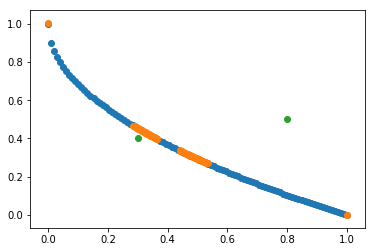

In [7]:
%matplotlib inline  

import numpy as np

from pymoo.optimize import minimize
from pymoo.util import plotting
from pymop.factory import get_problem

problem = get_problem("zdt1")
pf = problem.pareto_front()

# create the reference directions to be used for the optimization
ref_points = np.array([[0.3, 0.4], [0.8, 0.5]])

res = minimize(problem,
               method='rnsga3',
               method_args={
                   'ref_points': ref_points,
                   'pop_per_ref_point': 50,
                   'mu': 0.1
               },
               termination=('n_gen', 400),
               pf=pf,
               disp=False)

plotting.plot(pf, res.F, ref_points, show=True, labels=['pf', 'F', 'ref_points'])


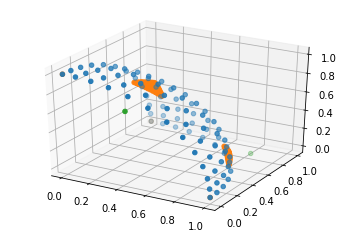

In [8]:
from pymop.factory import UniformReferenceDirectionFactory

problem = get_problem("dtlz4", n_var=12, n_obj=3)
ref_dirs = UniformReferenceDirectionFactory(3, n_points=91).do()
pf = problem.pareto_front(ref_dirs)

# create the reference directions to be used for the optimization
ref_points = np.array([[1.0, 0.5, 0.2], [0.3, 0.2, 0.6]])

res = minimize(problem,
               method='rnsga3',
               method_args={
                   'ref_points': ref_points,
                   'pop_per_ref_point': 91,
                   'mu': 0.1
               },
               termination=('n_gen', 400),
               pf=pf,
               disp=False)

plotting.plot(pf, res.F, ref_points, show=True, labels=['pf', 'F', 'ref_points'])
